In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm

In [3]:
os.getcwd()

'/Users/ys/正交序列回归'

In [4]:
os.listdir('/Users/ys/正交序列回归/data')

['pdrInfo.txt',
 '.DS_Store',
 'ExE_WT.mhap.gz.tbi',
 'ExE_WT.mhap',
 'mm9_Promoter.bed']

In [5]:
bed=pd.read_csv('data/mm9_Promoter.bed',sep="\t",header=None)
bed

,0,1,2,3
0,chr11,96685044,96686441,Nfe2l1
1,chr11,96690615,96692282,Nfe2l1
2,chr2,181053427,181055710,Rtel1
3,chr6,82889562,82890763,Sema4f
4,chr14,51301119,51302320,Olfr747
...,...,...,...,...
30018,chr5,109435289,109436490,Vmn2r10
30019,chrX,121249310,121250511,Vmn2r122
30020,chrUn_random,2734816,2736017,Vmn2r122
30021,chr7,51841725,51842926,Kcnc3


In [6]:
mhap=pd.read_csv("data/ExE_WT.mhap",sep="\t",header=None,dtype="str")
mhap

,0,1,2,3,4,5
0,chr1,3004692,3004780,00,1,+
1,chr1,3004692,3004780,00,1,+
2,chr1,3004692,3004780,00,1,+
3,chr1,3004692,3004780,01,1,+
4,chr1,3004692,3004780,01,1,+
...,...,...,...,...,...,...
2141,chr1,3815322,3815322,0,1,+
2142,chr1,3815322,3815322,1,1,+
2143,chr1,3815939,3815939,0,1,-
2144,chr1,3821227,3821231,00,1,+


In [7]:
pdrInfo=pd.read_table('data/pdrInfo.txt')
pdrInfo

,chr,start,end,gene,Total reads,reads after kmer,PDR,AveMe,mean_pdr,sd_pdr,z_score
0,chr11,96685044,96686441,Nfe2l1,32.0,5.0,0.600000,0.300000,0.703704,0.204208,-0.507833
1,chr11,96690615,96692282,Nfe2l1,1611.0,5962.0,0.017108,0.004361,0.018789,0.001758,-0.955828
2,chr2,181053427,181055710,Rtel1,637.0,3368.0,0.011580,0.003118,0.011628,0.001847,-0.026264
3,chr6,82889562,82890763,Sema4f,350.0,1974.0,0.031408,0.007979,0.036058,0.004196,-1.108175
4,chr14,51301119,51302320,Olfr747,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
30018,chr5,109435289,109436490,Vmn2r10,0.0,0.0,NaN,NaN,NaN,NaN,NaN
30019,chrX,121249310,121250511,Vmn2r122,0.0,0.0,NaN,NaN,NaN,NaN,NaN
30020,chrUn_random,2734816,2736017,Vmn2r122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30021,chr7,51841725,51842926,Kcnc3,817.0,1528.0,0.460733,0.193063,0.553570,0.012717,-7.299950


In [8]:
dat=pdrInfo.loc[:,["PDR","AveMe"]]
dat

,PDR,AveMe
0,0.600000,0.300000
1,0.017108,0.004361
2,0.011580,0.003118
3,0.031408,0.007979
4,NaN,NaN
...,...,...
30018,NaN,NaN
30019,NaN,NaN
30020,NaN,NaN
30021,0.460733,0.193063


In [9]:
dt=dat.dropna(axis=0,how='any') 
dt

,PDR,AveMe
0,0.600000,0.300000
1,0.017108,0.004361
2,0.011580,0.003118
3,0.031408,0.007979
6,0.016588,0.004295
...,...,...
30001,0.442623,0.159836
30002,0.552941,0.234559
30005,0.173913,0.053571
30021,0.460733,0.193063


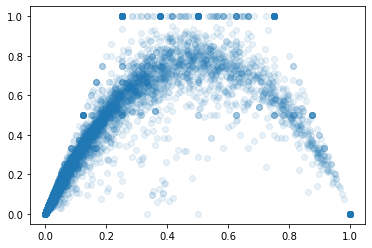

In [10]:
plt.scatter(dt.iloc[:,1],dt.iloc[:,0],alpha=0.1)

In [11]:
def data_process(x):
    x=np.array(x)
    lx=len(x)
    x=x.reshape((lx,1))
    x=(2*x-np.min(x)-np.max(x))/(np.max(x)-np.min(x))
#     x=2*x-1
    return lx,x

In [12]:
def P(x,k,lx):
#     lx,x=data_process(x)
    if(k==0):
        res=np.sqrt(1/2)*np.ones(lx).reshape((lx,1))
    elif(k==1):
        res=np.sqrt(3/2)*x
    elif(k>=2):
        res=((2*k-1)*x*P(x,k-1,lx)-(k-1)*P(x,k-2,lx))/k
    return res

In [13]:
def X_to_Z(x,K):
    lx,x=data_process(x)
    Z=P(x,0,lx=lx)
    for k in range(0,K):
        Z=np.concatenate((Z,P(x,k+1,lx)),axis=1)
#         print(Z)
    return Z

In [14]:
Z=X_to_Z(dt.iloc[:,1],20)

In [15]:
pd.DataFrame(Z)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.707107,-0.489898,-0.059615,0.366342,-0.211728,-0.140629,0.279568,-0.087140,-0.179267,0.212904,...,-0.193193,0.148542,0.064069,-0.187356,0.085092,0.109701,-0.165266,0.024934,0.137145,-0.130660
1,0.707107,-1.214063,1.451657,-1.588952,1.667670,-1.704463,1.707869,-1.683125,1.633949,-1.563317,...,-1.367961,1.248035,-1.116401,0.975390,-0.827333,0.674549,-0.519331,0.363929,-0.210525,0.061210
2,0.707107,-1.217108,1.460726,-1.607958,1.700837,-1.756051,1.781989,-1.783586,1.764133,-1.726064,...,-1.601721,1.518751,-1.423951,1.318800,-1.204762,1.083297,-0.955865,0.823923,-0.688922,0.552295
3,0.707107,-1.205201,1.425400,-1.534290,1.573112,-1.558984,1.501602,-1.407917,1.283818,-1.134811,...,-0.783667,0.592286,-0.397452,0.204302,-0.017727,-0.157736,0.317991,-0.459477,0.579238,-0.674986
4,0.707107,-1.214224,1.452138,-1.589957,1.669420,-1.707178,1.711757,-1.688375,1.640722,-1.571742,...,-1.379912,1.261772,-1.131876,0.992508,-0.845947,0.694467,-0.540318,0.385708,-0.232783,0.083605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16936,0.707107,-0.833228,0.496749,-0.007768,-0.363313,0.451124,-0.259912,-0.058288,0.301776,-0.335990,...,0.094117,-0.271875,0.268823,-0.100257,-0.119033,0.250893,-0.219307,0.053158,0.137338,-0.232699
16937,0.707107,-0.650195,0.164213,0.288168,-0.390880,0.142986,0.186567,-0.306501,0.141846,0.130205,...,0.144125,0.090762,-0.225700,0.146803,0.059979,-0.199321,0.148957,0.034484,-0.176768,0.150233
16938,0.707107,-1.093522,1.110985,-0.924237,0.610882,-0.242384,-0.112308,0.393983,-0.561300,0.596430,...,0.321366,-0.085545,-0.149761,0.337315,-0.442493,0.449240,-0.362156,0.204461,-0.012405,-0.172639
16939,0.707107,-0.751839,0.338749,0.154644,-0.420193,0.340587,-0.033148,-0.254141,0.321525,-0.146918,...,0.271866,-0.211697,-0.001039,0.197806,-0.233791,0.092623,0.109665,-0.218378,0.157165,0.019324


In [16]:
t=dt.iloc[:,0]

In [17]:
m=dt.iloc[:,1]

In [18]:
model=sm.OLS(t,Z).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PDR   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.364e+04
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        22:46:48   Log-Likelihood:                 24216.
No. Observations:               16941   AIC:                        -4.839e+04
Df Residuals:                   16920   BIC:                        -4.823e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9249      0.002    527.505      0.000       0.921       0.928
x2             0.0286      0.002     12.917      0.000       0.024       0.033
x3            -0.4099      0.003   -124.146      0.000      -0.416      -0.403
x4            -0.0267      0.004     -6.219      0.000      -0.035      -0.018
x5            -0.0466      0.005     -9.279      0.000      -0.056      -0.037
x6            -0.0051      0.006     -0.897      0.370      -0.016       0.006
x7             0.0181      0.006      2.975      0.003       0.006       0.030
x8             0.0065      0.006      1.056      0.291      -0.006       0.019
x9             0.0150      0.006      2.448      0.014       0.003       0.027
x10           -0.0284      0.006     -4.666      0.000      -0.040      -0.016
x11           -0.0852      0.006    -14.802      0.000      -0.096      -0.074
x12            0.0055      0.006      0.902      0.367      -0.006       0.017
x13            0.0708      0.006     12.222      0.000       0.059       0.082
x14           -0.0078      0.006     -1.278      0.201      -0.020       0.004
x15           -0.0180      0.006     -2.775      0.006      -0.031      -0.005
x16            0.0095      0.007      1.394      0.163      -0.004       0.023
x17           -0.0461      0.007     -6.472      0.000      -0.060      -0.032
x18           -0.0140      0.008     -1.846      0.065      -0.029       0.001
x19            0.0645      0.008      8.235      0.000       0.049       0.080
x20            0.0335      0.008      4.059      0.000       0.017       0.050
x21           -0.0041      0.005     -0.830      0.407      -0.014       0.006
==============================================================================
Omnibus:                     5270.371   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           636469.804
Skew:                          -0.422   Prob(JB):                         0.00
Kurtosis:                      33.016   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
p=model.predict(Z)

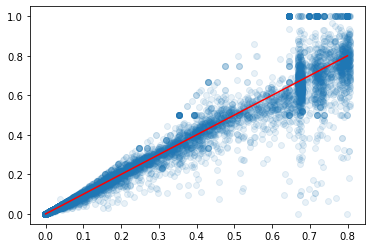

In [21]:
plt.scatter(p,t,alpha=0.1)
plt.plot([0,0.8],[0,0.8],c="red")

In [22]:
np.corrcoef(p,t)

array([[1.        , 0.97035106],
       [0.97035106, 1.        ]])

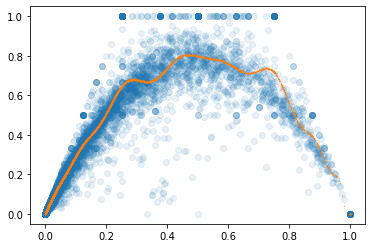

In [23]:
plt.scatter(m,t,alpha=0.1)

plt.scatter(m,p,s=0.1)

In [24]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [25]:
prstd, iv_l, iv_u = wls_prediction_std(model)

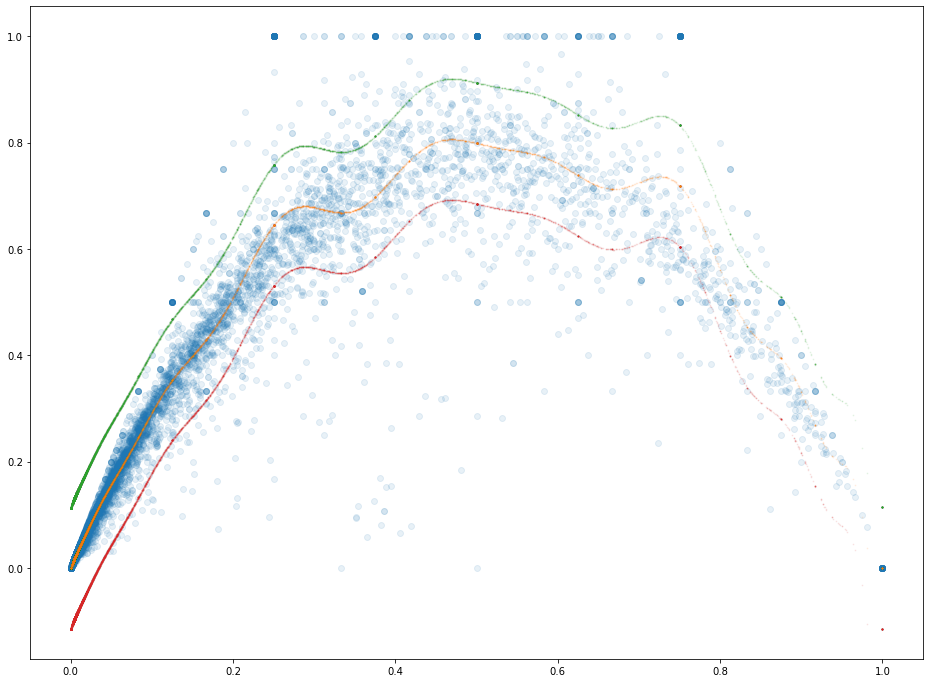

In [26]:
plt.subplots(figsize=(16,12))
plt.scatter(m, t,alpha=0.1)
plt.scatter(m, p,alpha=0.1,s=0.5)
plt.scatter(m, iv_u,alpha=0.1,s=0.5)
plt.scatter(m, iv_l,alpha=0.1,s=0.5)

In [27]:
mp=[i/10000 for i in range(10001)]
M=X_to_Z(mp,20)

In [28]:
#prstd 标准差
prstd, iv_l, iv_u = wls_prediction_std(model,M,alpha=0.05)
prstd, iv_l, iv_u

(array([0.05801858, 0.0580159 , 0.05801338, ..., 0.05859757, 0.05855768,
        0.05855304]),
 array([-0.11425908, -0.11379386, -0.1133318 , ..., -0.12017163,
        -0.11741696, -0.11466802]),
 array([0.11318583, 0.11364057, 0.11409273, ..., 0.10954305, 0.11214135,
        0.1148721 ]))

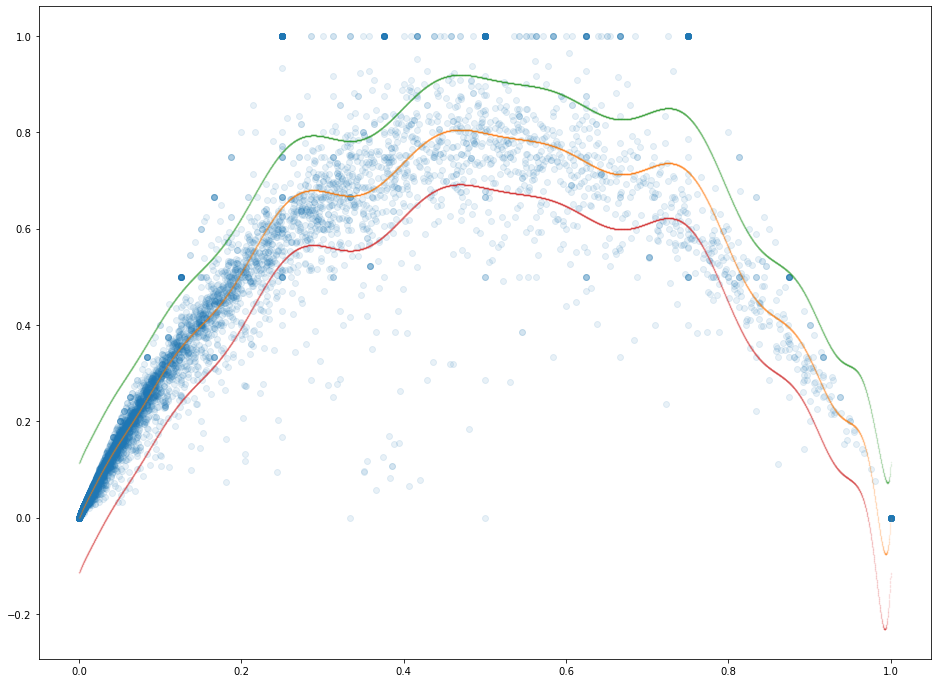

In [29]:
plt.subplots(figsize=(16,12))
plt.scatter(m, t,alpha=0.1)
plt.scatter(mp, (iv_u+iv_l)/2,alpha=0.1,s=0.3)
plt.scatter(mp, iv_u,alpha=0.1,s=0.3)
plt.scatter(mp, iv_l,alpha=0.1,s=0.3)

核密度估计

In [30]:
##kernel function
from scipy import stats
def K(u,kernel="gaussian"):
    if(kernel=="gaussian"):
        res=stats.norm(0, 1).pdf(u)
    elif(kernel=="uniform"):
        res=stats.uniform(-1,1).pdf(u)
    elif(kernel=="epanechikov"):
        lu=len(u)
        res=np.zeros(lu)
        for i in range(lu):
            if(np.abs(u[i]<1)):
                res[i]=3*(1-u[i]**2)/4
    elif(kernel=="cosinus"):
        lu=len(u)
        res=np.zeros(lu)
        for i in range(lu):
            if(np.abs(u[i]<1)):
                res[i]=np.pi*np.cos(np.pi*u[i]/2)/4
    return res

In [31]:
# weighting function
def l(x,xi,x_s,bw,kernel="gaussian"):
    x=np.array(x)
    x_s=np.array(x_s)
    K_sum=np.sum(K((x-x_s)/bw))
    res=K((x-xi)/bw)/K_sum
    return res

In [33]:
# My kernel smoother
def myksmooth(x,x_s,y_s,bw,kernel="gaussian"):
    try:
        lx=len(x)
    except:
        lx=1
    n=len(x_s)
    x_s=np.array(x_s)
    y_s=np.array(y_s)
    res=np.zeros(lx)
    for j in range(lx):
        w_s=np.zeros(n)
        for i in range(n):
            try:
                w_s[i]=l(x,x_s[i],x_s,bw,kernel)
            except:
                w_s[i]=l(x[j],x_s[i],x_s,bw,kernel)
        res[j]=np.squeeze(np.dot(y_s,w_s))
    return res
    

In [44]:
# defining the score function to determine the bandwidth.
def hatR(bw,x_s,y_s,kernel="gaussian"):
    try:
        lx=len(bw)
    except:
        lx=1
    n=len(x_s)
    x_s=np.array(x_s)
    res=np.zeros(lx)
    for j in range(lx):
        w_s=np.zeros(n)
        for i in range(n):
            w_s[i]=l(x_s[i],x_s[i],x_s,bw,kernel)
            
        hatm_s=np.ones(n)
        for i in range(n):
            try:
                hatm_s[i]=myksmooth(x_s[i],x_s,y_s,bw,kernel)
            except:
                hatm_s[i]=myksmooth(x_s[i],x_s,y_s,bw[j],kernel)
            
        res[j]=np.mean(((y_s-hatm_s)/(1-w_s))**2)
    return res


In [43]:
# determining the bandwidth by cross-validation
from scipy.optimize import fmin,fminbound
def f(bw):
    return hatR(bw,x_s,y_s,kernel)
def bw_cv(x_s,y_s,kernel="gaussian"):
    hstar=fminbound(f,0,1)
    return hstar

In [ ]:
hatR(0.1,m,t)

In [ ]:
h_cv=bw_cv(m,t)

In [ ]:
h_cv

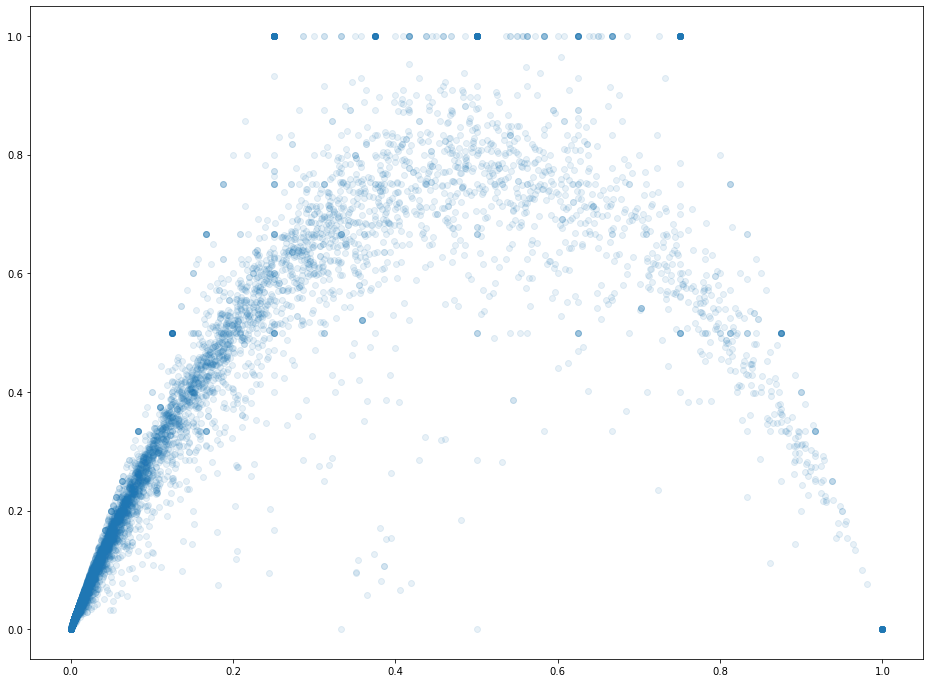

In [36]:
plt.subplots(figsize=(16,12))
plt.scatter(m, t,alpha=0.1)